### This is a data exploartory analysis and data visualization from 

#### https://www.kaggle.com/shivamb/netflix-shows

In [1]:
#Import all libraries needed

# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




#### First of all , load the dataset and look the overview of the data

In [2]:
filepath= '../Documents/Kaggle/netflix/netflix_titles.csv'

dataset = pd.read_csv(filepath)


In [3]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


#### Check the type column whether it has some missing values or not, if it has some , then drop them.

In [5]:
dataset.type.isnull().sum()

0

#### Then visualize the data using histplot 

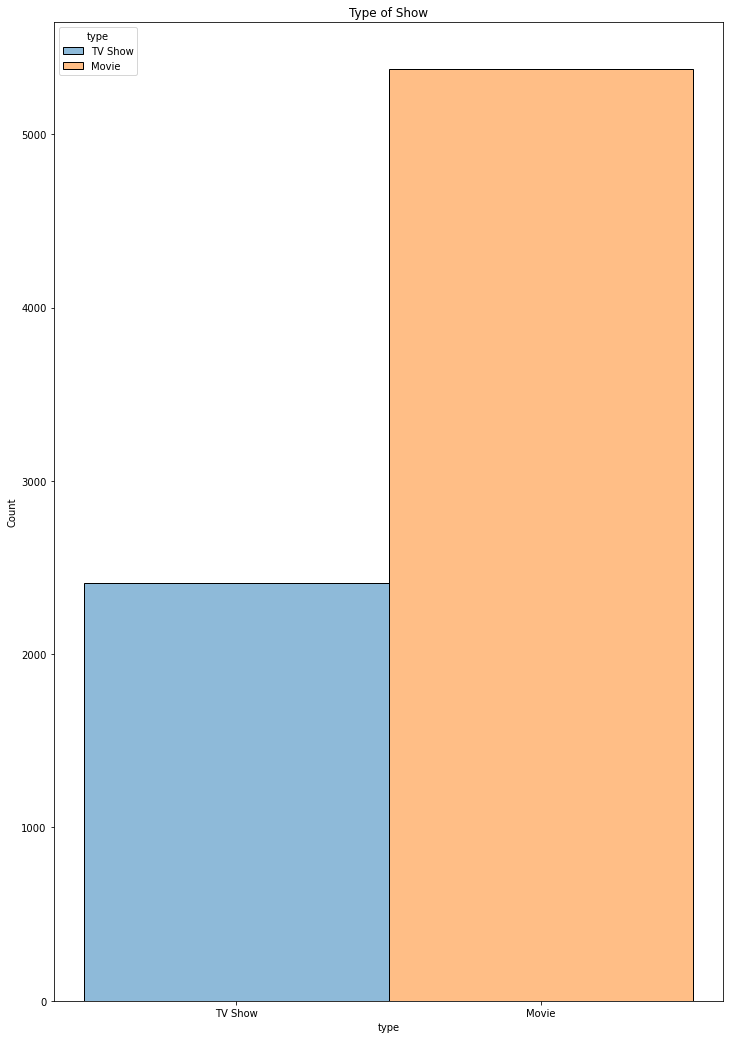

In [6]:
fig = plt.figure(figsize=(12,18))


sns.histplot(dataset,x='type',hue='type',element='bars')
plt.title("Type of Show")
plt.show()

#### We might also want to see the percentage of Movie over TV Show

In [7]:
grouped = dataset.groupby("type")['type'].count()
grouped

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

Text(0.5, 1.0, 'Percentage of Types')

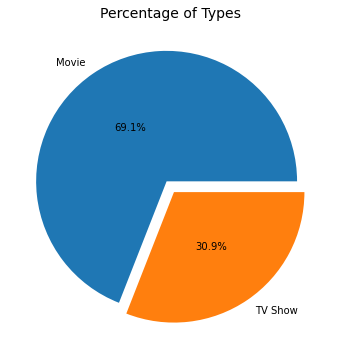

In [8]:
pie, ax = plt.subplots(figsize=[10,6])
labels = grouped.keys()
plt.pie(x=grouped, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of Types", fontsize=14)

#### As we can see, the majority of netflix content are Movies. It's twice than the TV Show. 
#### We done with the type column. Then we move to look at the release year of each type. But first , we need to arrange the data to be able to get plotted.

In [9]:
grouped_year = dataset.groupby("release_year")['type'].count()
grouped_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: type, Length: 73, dtype: int64

In [10]:
d1 = dataset[dataset["type"] == "TV Show"]
d2 = dataset[dataset["type"] == "Movie"]
d1_ = d1.groupby('release_year')['type'].count()
d2_ = d2.groupby('release_year')['type'].count()


In [11]:
grouped_y = dataset.groupby(['type','release_year'])['type'].count()
grouped_y

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            268
         2018            387
         2019            414
         2020            457
         2021             19
Name: type, Length: 118, dtype: int64

#### Plot the release year over each of type

Text(0, 0.5, 'Count')

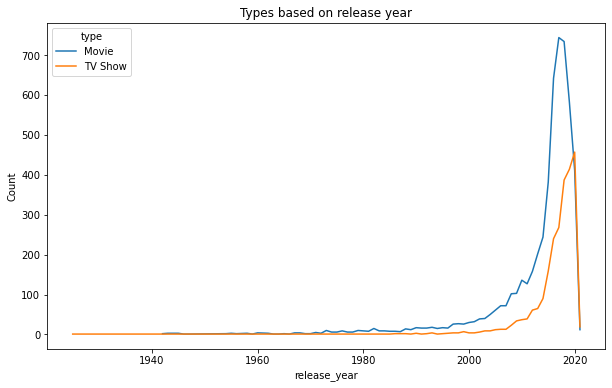

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_y,x='release_year',y=grouped_y,hue='type')
plt.title('Types based on release year')
plt.ylabel('Count')

In [13]:
dataset.date_added.isnull().sum()

10

#### Then we might want to look at the date added column where each type of contents get uploaded to netflix.
#### But first we need to extract all the date because we want only the month and the year

In [14]:
dataset[dataset['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [15]:
dataset['date_added']=pd.to_datetime(dataset['date_added'])
dataset.date_added

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

In [16]:
dataset['day_added'] = dataset['date_added'].dt.day
dataset['month_added'] = dataset['date_added'].dt.month
dataset['year_added'] = dataset['date_added'].dt.year


In [17]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,1.0,2020.0


#### Since we only need the type,year and month only , we can look at them separately

In [18]:
df_added = dataset[['type','year_added','month_added']]
df_added=df_added.dropna()
df_added.head()

,type,year_added,month_added
0,TV Show,2020.0,8.0
1,Movie,2016.0,12.0
2,Movie,2018.0,12.0
3,Movie,2017.0,11.0
4,Movie,2020.0,1.0


In [19]:
df_added.isnull().sum()

type           0
year_added     0
month_added    0
dtype: int64

#### We need to sort the date so we can look at the visualization better.

In [20]:
from datetime import datetime
df_added[['year_added','month_added']]=df_added[['year_added','month_added']].astype(int)
df_added['month_added_s']=df_added.apply(
    lambda row: '{:%b}'.format(datetime.strptime(str(row['month_added']), '%m')),
    axis=1
)
df_added=df_added.sort_values(by='month_added')
df_added.head()

,type,year_added,month_added,month_added_s
3916,Movie,2020,1,Jan
2679,Movie,2018,1,Jan
5103,Movie,2021,1,Jan
2673,Movie,2017,1,Jan
2672,TV Show,2021,1,Jan


In [21]:
df_year = df_added.groupby(['type','year_added'])['type'].count()
df_year.head()

type   year_added
Movie  2008           1
       2009           2
       2010           1
       2011          13
       2012           3
Name: type, dtype: int64

In [22]:
df_month = df_added.groupby(['type','month_added'])['type'].count()
# df_month=df_month.sort_values(key='month_added')
df_month=df_month.rename({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_month

type     month_added
Movie    Jan            560
         Feb            328
         Mar            471
         Apr            420
         May            371
         Jun            377
         Jul            403
         Aug            414
         Sep            415
         Oct            553
         Nov            511
         Dec            554
TV Show  Jan            197
         Feb            144
         Mar            198
         Apr            181
         May            172
         Jun            165
         Jul            197
         Aug            204
         Sep            204
         Oct            232
         Nov            227
         Dec            279
Name: type, dtype: int64

#### Plot the data using lineplot

Text(0, 0.5, 'Count')

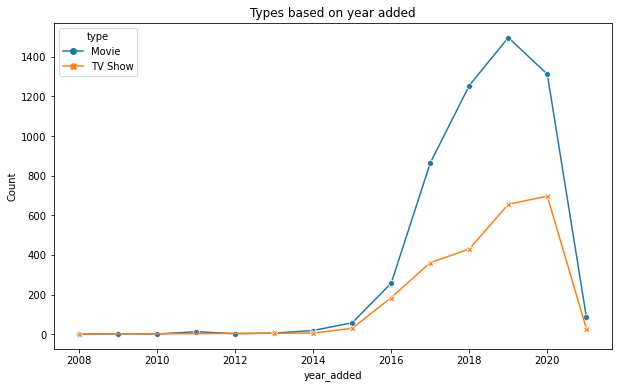

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year,x='year_added',y=df_year,hue='type',markers=True,dashes=False,style='type')
plt.title('Types based on year added')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

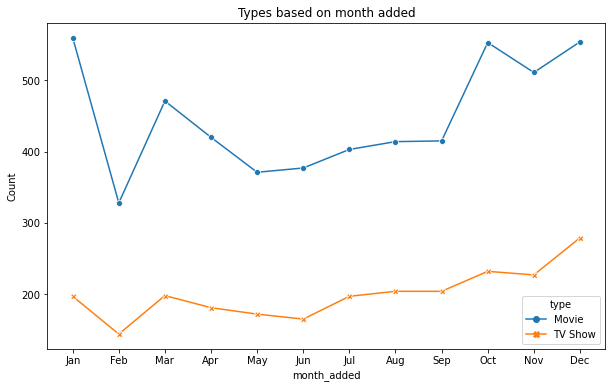

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_month,x='month_added',y=df_month,hue='type',markers=True,dashes=False,style='type')
plt.title('Types based on month added')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

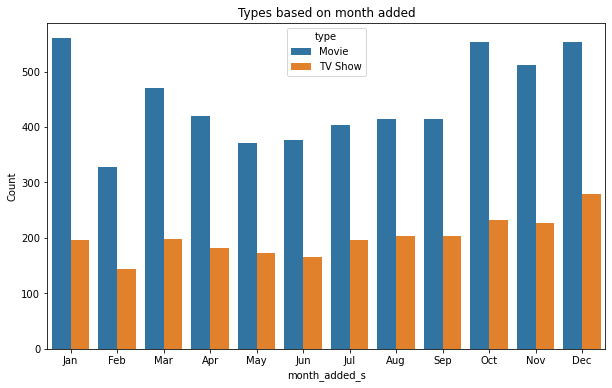

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_added,x='month_added_s',hue='type')
plt.title('Types based on month added')
plt.ylabel('Count')

#### Then look at the country column, in this column we need to separate and make a new dataframe since each type sometimes has more than one country

In [26]:
country_df = dataset['country'].dropna()
country_df.isna().sum()

0

In [27]:
import math
n_countries= []
for i in country_df:
    if ',' in i:
        n_countries.extend(i.split(', '))
    else:
        n_countries.append(i)
print(n_countries)
        

['Brazil', 'Mexico', 'Singapore', 'United States', 'United States', 'Turkey', 'Egypt', 'United States', 'India', 'India', 'United States', 'Poland', 'United States', 'Mexico', 'Thailand', 'United States', 'Nigeria', 'Norway', 'Iceland', 'United States', 'India', 'United Kingdom', 'India', 'India', 'India', 'India', 'Japan', 'United States', 'United States', 'South Korea', 'Italy', 'United States', 'Canada', 'Indonesia', 'Indonesia', 'United States', 'Canada', 'United States', 'Romania', 'Romania', 'Spain', 'Turkey', 'Iceland', 'Turkey', 'Nigeria', 'United States', 'Turkey', 'United States', 'United States', 'South Africa', 'Nigeria', 'France', 'United States', 'South Africa', 'South Korea', 'Spain', 'United States', 'Portugal', 'Spain', 'United States', 'United States', 'Indonesia', 'United Kingdom', 'India', 'United States', 'South Korea', 'United States', 'United States', 'United States', 'United States', 'United States', 'Hong Kong', 'China', 'Singapore', 'United States', 'United St

In [28]:
countries_df = pd.Series(n_countries)
# countries_df=countries_df.value_counts()
countries_df.nunique()

121

In [29]:
index, counts = np.unique(countries_df.values,return_counts=True)
countries_df= pd.DataFrame(list(zip(index,counts)),columns=['Country','Count'])
countries_df=countries_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
countries_df.head()

,Country,Count
0,United States,3296
1,India,990
2,United Kingdom,722
3,Canada,412
4,France,349


In [30]:
countries_df.describe()

,Count
count,121.000000
mean,74.900826
std,321.125946
min,1.000000
25%,1.000000
50%,5.000000
75%,39.000000
max,3296.000000


#### Then we plot it.

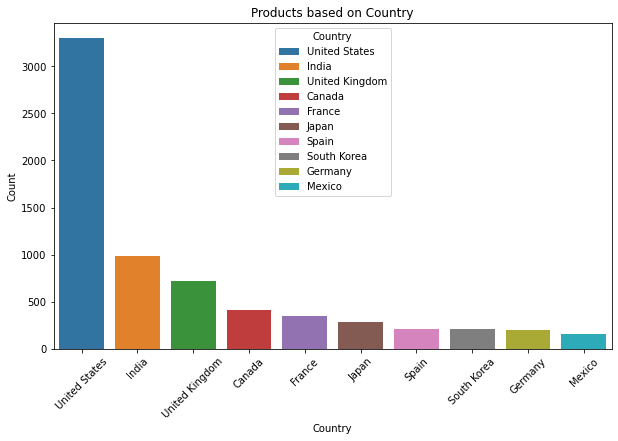

In [31]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=countries_df.head(10),x='Country',y='Count',hue='Country',dodge=False)
plt.title('Products based on Country')
plt.xticks(rotation=45)
plt.show()

#### Director column. Here, I didn't separate each of the directors because I thought maybe some people might like to see content from two particular directors rather than if this two particular directors direct different movie by him/herself

In [32]:
director_df = dataset['director']
director_df.head()

0                  NaN
1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
Name: director, dtype: object

In [33]:
director_df = director_df.dropna()
director_df

1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
5             Serdar Akar
              ...        
7780         Shlok Sharma
7781         Peter Hewitt
7782          Josef Fares
7783          Mozez Singh
7786             Sam Dunn
Name: director, Length: 5398, dtype: object

In [34]:
index, counts = np.unique(director_df.values,return_counts=True)
director_df= pd.DataFrame(list(zip(index,counts)),columns=['Director','Count'])
director_df=director_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
director_df.head()

,Director,Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12


In [35]:
director_df['Director'].unique()

array(['Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas', ...,
       'Jon J. Whelan', 'Benjamin Cohen, Nicolas Cotto', 'Kevin Reynolds'],
      dtype=object)

In [36]:
director_df['Director'].nunique()
director_df['Count']=director_df['Count'].astype(int)

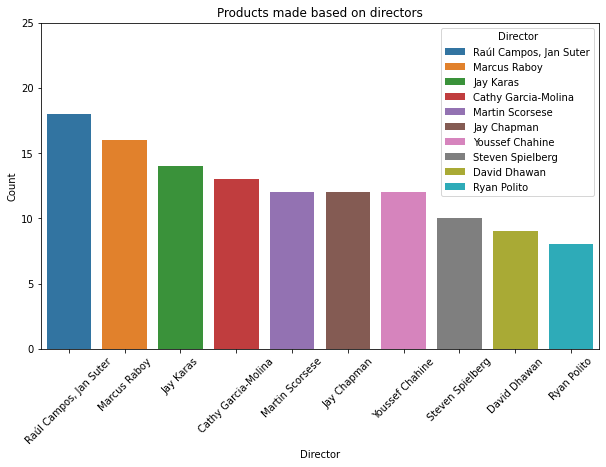

In [37]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=director_df.head(10),x='Director',y='Count',hue='Director',dodge=False)
plt.title('Products made based on directors')
plt.ylim(0,25)
plt.ticklabel_format(style='sci', axis='y')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Rating based
rating_df = dataset['rating'].dropna()
rating_df.head()

0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
Name: rating, dtype: object

In [39]:
index, counts = np.unique(rating_df.values,return_counts=True)
rating_df= pd.DataFrame(list(zip(index,counts)),columns=['Rating','Count'])
rating_df=rating_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
rating_df

,Rating,Count
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


#### Rating columns Visualization

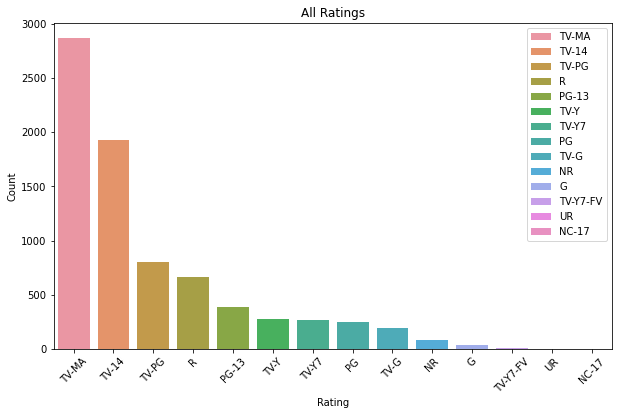

In [40]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=rating_df,x='Rating',y='Count',hue='Rating',dodge=False)
plt.title('All Ratings')
plt.ticklabel_format(style='sci', axis='y')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

#### Then we might want to look at the distribution of the Movie or TV Show duration. Here we can see that TV Show has duration type of Season/s and Movie has duration of minute

In [41]:
# Duration 

duration_df = dataset[['type','duration']]
duration_df.head()

,type,duration
0,TV Show,4 Seasons
1,Movie,93 min
2,Movie,78 min
3,Movie,80 min
4,Movie,123 min


In [42]:
duration_df.keys()

Index(['type', 'duration'], dtype='object')

In [43]:
movie_d=duration_df.duration[duration_df['type']=='Movie']
movie_d = [x.split(' ')[0] for x in movie_d]
movie_d

['93',
 '78',
 '80',
 '123',
 '95',
 '119',
 '118',
 '143',
 '103',
 '89',
 '91',
 '149',
 '144',
 '124',
 '87',
 '110',
 '128',
 '117',
 '100',
 '84',
 '99',
 '95',
 '90',
 '102',
 '104',
 '99',
 '105',
 '56',
 '125',
 '119',
 '81',
 '97',
 '106',
 '99',
 '107',
 '93',
 '89',
 '105',
 '87',
 '97',
 '109',
 '93',
 '109',
 '44',
 '75',
 '101',
 '89',
 '90',
 '90',
 '93',
 '101',
 '37',
 '113',
 '89',
 '84',
 '102',
 '102',
 '114',
 '130',
 '90',
 '94',
 '97',
 '143',
 '91',
 '107',
 '95',
 '119',
 '93',
 '101',
 '93',
 '140',
 '135',
 '82',
 '70',
 '104',
 '117',
 '121',
 '92',
 '124',
 '164',
 '53',
 '93',
 '91',
 '83',
 '93',
 '114',
 '116',
 '93',
 '81',
 '84',
 '105',
 '86',
 '120',
 '106',
 '92',
 '96',
 '97',
 '99',
 '100',
 '126',
 '96',
 '75',
 '94',
 '129',
 '80',
 '103',
 '96',
 '77',
 '137',
 '148',
 '123',
 '121',
 '95',
 '28',
 '99',
 '104',
 '122',
 '104',
 '94',
 '176',
 '107',
 '90',
 '94',
 '101',
 '87',
 '92',
 '85',
 '93',
 '22',
 '95',
 '86',
 '137',
 '101',
 '68',
 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


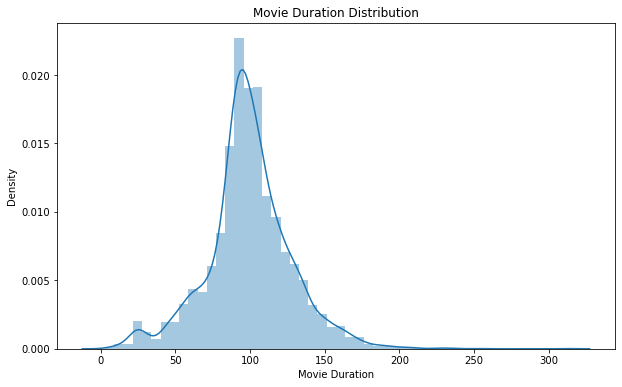

In [44]:
fig = plt.figure(figsize=(10,6))
sns.distplot(movie_d)
plt.title('Movie Duration Distribution')
plt.xlabel('Movie Duration')
plt.show()

In [45]:
tv_d=duration_df.duration[duration_df['type']=='TV Show']
tv_d = [int(x.split(' ')[0]) for x in tv_d]
tv_d.sort()
tv_d

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


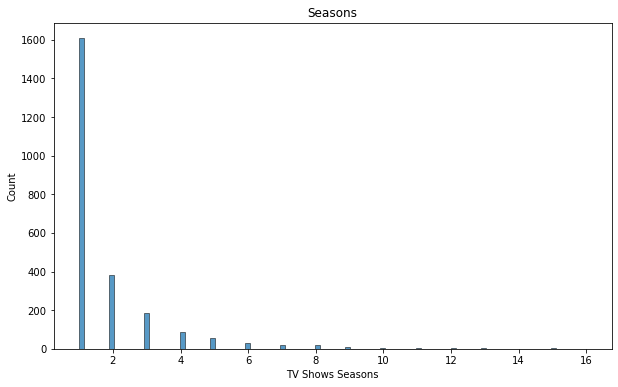

In [46]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=tv_d)
plt.title('Seasons')
plt.xlabel('TV Shows Seasons')
plt.show()

#### We look at the listed in column 

In [47]:
list_ = dataset['listed_in'].dropna()
list_.head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [48]:
new_list= []
for i in list_:
    if ',' in i:
        new_list.extend(i.split(', '))
    else:
        new_list.append(i)
print(new_list)

['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies', 'Horror Movies', 'International Movies', 'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy', 'Dramas', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Horror Movies', 'International Movies', 'Dramas', 'Horror Movies', 'International Movies', 'Horror Movies', 'International Movies', 'Thrillers', 'Dramas', 'Thrillers', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'Documentaries', 'International Movies', 'Sports Movies', 'Independent Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Dramas', 'International Movies', 'Thrillers', 'International TV Shows', 'TV Dramas', 'Dramas', 'Thrillers', 'Comedies', 'Dramas', 'Independent Movies', 'Sports Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Action & Adventure', 'Dramas', 'International Movies', 'Dramas', 'International Movies', 'Dramas', 'Internati

In [49]:
new_list = pd.Series(new_list)
index, counts = np.unique(new_list.values,return_counts=True)
list_df= pd.DataFrame(list(zip(index,counts)),columns=['Category','Count'])
list_df=list_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
list_df.head()

,Category,Count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


#### Plot the top 10 Category in netflix

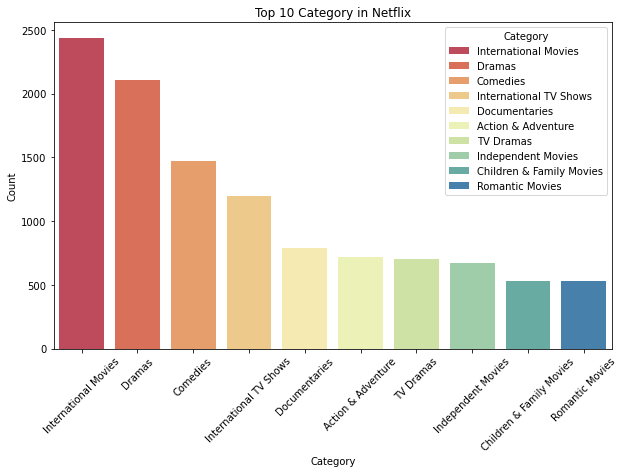

In [50]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=list_df.head(10),x='Category',y='Count',hue='Category',dodge=False,palette='Spectral')
plt.title('Top 10 Category in Netflix')
plt.xticks(rotation=45)
plt.show()

In [51]:
new_list.head()

0    International TV Shows
1                 TV Dramas
2       TV Sci-Fi & Fantasy
3                    Dramas
4      International Movies
dtype: object

In [52]:
cat_type = dataset[['type','listed_in']]
cat_type

,type,listed_in
0,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,"Dramas, International Movies"
2,Movie,"Horror Movies, International Movies"
3,Movie,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,Dramas
...,...,...
7782,Movie,"Dramas, International Movies"
7783,Movie,"Dramas, International Movies, Music & Musicals"
7784,Movie,"Documentaries, International Movies, Music & M..."
7785,TV Show,"International TV Shows, Reality TV"


In [53]:
movie_cat= cat_type[cat_type['type']=='Movie']
movie_cat

,type,listed_in
1,Movie,"Dramas, International Movies"
2,Movie,"Horror Movies, International Movies"
3,Movie,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,Dramas
6,Movie,"Horror Movies, International Movies"
...,...,...
7781,Movie,"Children & Family Movies, Comedies"
7782,Movie,"Dramas, International Movies"
7783,Movie,"Dramas, International Movies, Music & Musicals"
7784,Movie,"Documentaries, International Movies, Music & M..."


In [54]:
mv_cat=[]
for i in movie_cat['listed_in']:
    if ',' in i:
        mv_cat.extend(i.split(', '))
    else:
        mv_cat.append(i)
print(mv_cat)

['Dramas', 'International Movies', 'Horror Movies', 'International Movies', 'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy', 'Dramas', 'Horror Movies', 'International Movies', 'Dramas', 'Horror Movies', 'International Movies', 'Horror Movies', 'International Movies', 'Thrillers', 'Dramas', 'Thrillers', 'Documentaries', 'International Movies', 'Sports Movies', 'Independent Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Dramas', 'International Movies', 'Thrillers', 'Dramas', 'Thrillers', 'Comedies', 'Dramas', 'Independent Movies', 'Sports Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Action & Adventure', 'Dramas', 'International Movies', 'Dramas', 'International Movies', 'Dramas', 'International Movies', 'Documentaries', 'Horror Movies', 'International Movies', 'Thrillers', 'Documentaries', 'International Movies', 'Documentaries', 'International Movies', 'Dramas', 'International Movies', 'Romantic Movies', 'Dramas', 'International Movies', 'Romantic Movies'

In [55]:
mv_cat = pd.Series(mv_cat)
index, counts = np.unique(mv_cat.values,return_counts=True)
mv_df= pd.DataFrame(list(zip(index,counts)),columns=['Category','Count'])
mv_df=mv_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
mv_df.head()

,Category,Count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action & Adventure,721


In [56]:
tv_cat= cat_type[cat_type['type']=='TV Show']
tv_cat

,type,listed_in
0,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
11,TV Show,"Crime TV Shows, International TV Shows, TV Dramas"
12,TV Show,"Crime TV Shows, Docuseries, International TV S..."
16,TV Show,"International TV Shows, TV Dramas"
...,...,...
7767,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
7775,TV Show,"Anime Series, Kids' TV"
7777,TV Show,"Kids' TV, Korean TV Shows, TV Comedies"
7779,TV Show,"International TV Shows, Spanish-Language TV Sh..."


In [57]:
tv_l=[]
for i in tv_cat['listed_in']:
    if ',' in i:
        tv_l.extend(i.split(', '))
    else:
        tv_l.append(i)
print(tv_l)

['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'International TV Shows', 'TV Dramas', 'Anime Series', 'International TV Shows', 'Reality TV', 'TV Comedies', 'International TV Shows', 'Romantic TV Shows', 'TV Comedies', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'International TV Shows', 'Romantic TV Shows', 'TV Dramas', 'Docuseries', 'Science & Nature TV', 'British TV Shows', 'International TV Shows', 'Reality TV', 'International TV Shows', 'Korean TV Shows', 'Romantic TV Shows', 'Crime TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'Docuseries', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'British TV Shows', 'Reality TV', 'International TV Shows', 'TV Dramas', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'International TV Shows', 'Korean TV Shows', 'Rom

In [58]:
tv_l = pd.Series(tv_l)
index, counts = np.unique(tv_l.values,return_counts=True)
tv_df= pd.DataFrame(list(zip(index,counts)),columns=['Category','Count'])
tv_df=tv_df.sort_values(by=['Count'],ignore_index=True,ascending=False)
tv_df.head()

,Category,Count
0,International TV Shows,1199
1,TV Dramas,704
2,TV Comedies,525
3,Crime TV Shows,427
4,Kids' TV,414


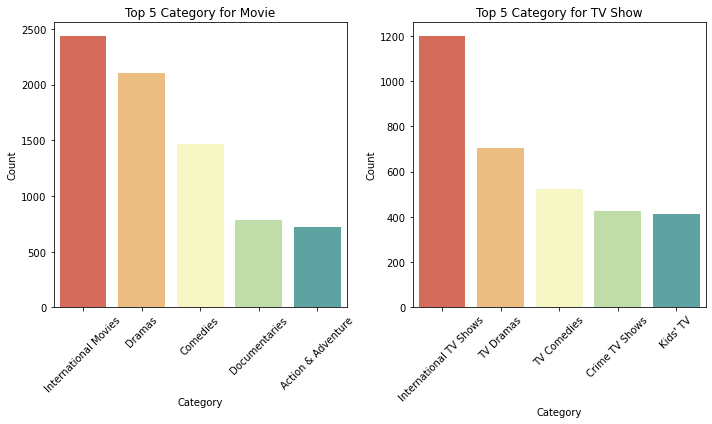

In [59]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
l_ = [mv_df,tv_df]
ctgy = ['Movie','TV Show']
for i in range(2):
    sns.barplot(data=l_[i].head(5),x='Category',y='Count',dodge=False,palette='Spectral',ax=axes[i])
j=0
for ax in fig.axes:
    plt.sca(ax)
    ax.set_title('Top 5 Category for '+ctgy[j])
    plt.xticks(rotation=45)
    fig.tight_layout()
    j+=1

plt.show()

### Conclusion 

#### 1. Majority of netflix contents are Movies by 69%
#### 2. Most of the netflix contents released in year around 2010
#### 3. Netflix contents added most in 2019 and in January and October
#### 4. United States is the country with the most netflix contents produced 
#### 5. TV-MA is the most rating contents in netflix
#### 6. The most category in netflix is International Movies for Movies and International TV Shows for TV Shows